In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from IPython.display import Image
from matplotlib import rcParams
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 26
rcParams['legend.fontsize']= 'x-large'
rcParams['axes.titlesize']= 'x-large'
rcParams['xtick.labelsize']= 'x-large'
rcParams['ytick.labelsize']= 'x-large'
rcParams['axes.labelsize']= 'x-large'
rcParams['figure.titlesize']= 'xx-large'
rcParams['legend.title_fontsize']= 'xx-large'
%matplotlib inline
#rcParams.keys()
import seaborn as sns

Con base en el applet que permite construir las formulas de $n$-puntos para la primera derivada y las derivadas de orden mayor

https://web.media.mit.edu/~crtaylor/calculator.html. 

a) Se construirá un código construyendo una función `my_derivative(f,x,N,p)` que tome como argumento un número $N$ (orden de la derivada) y $p$ para designar se se usa una fórmula de $p$-puntos (con p<5). 

b) Incluya en esta función también el cálculo de la derivada de $f$ de dicho orden usando `scipy.misc.derivative` y compare los resultados con los errores correspondientes con el resultado analítico para un par de funciones no tan triviales.

In [76]:
def my_derivative(f,a,p,N=1):
    assert((p>1) & (p<5))
    if p == 2:
        if N==1:
            return (f(a + h) - f(a - h))/(2*h)        
        else:
            raise ValueError("N must be < p")                    
    elif p == 3:
        if N==1:
            return (f(a + h) - f(a - h))/(2*h)
        elif N==2:
            return (f(a - h) - 2* f(a) + f(a + h))/(h**2)
        else:
            raise ValueError("N must be < p")                    
    elif p ==4:
        if N==1:
            return (f(a - 2*h) - 8*f(a - h) + 8*f(a + h) - f(a + 2*h))/(12*h)
        elif N==2:
            return (f(a - 2*h) - f(a - h) - f(a + h) + f(a + 2*h))/(3*h**2)
        elif N==3:
            return (-f(a - 2*h) + 2*f(a - h) - 2*f(a + h) + f(a + 2*h))/(2*h**3)
        else:
            raise ValueError("N must be < p")                    
    else:
        raise ValueError("ERROR")


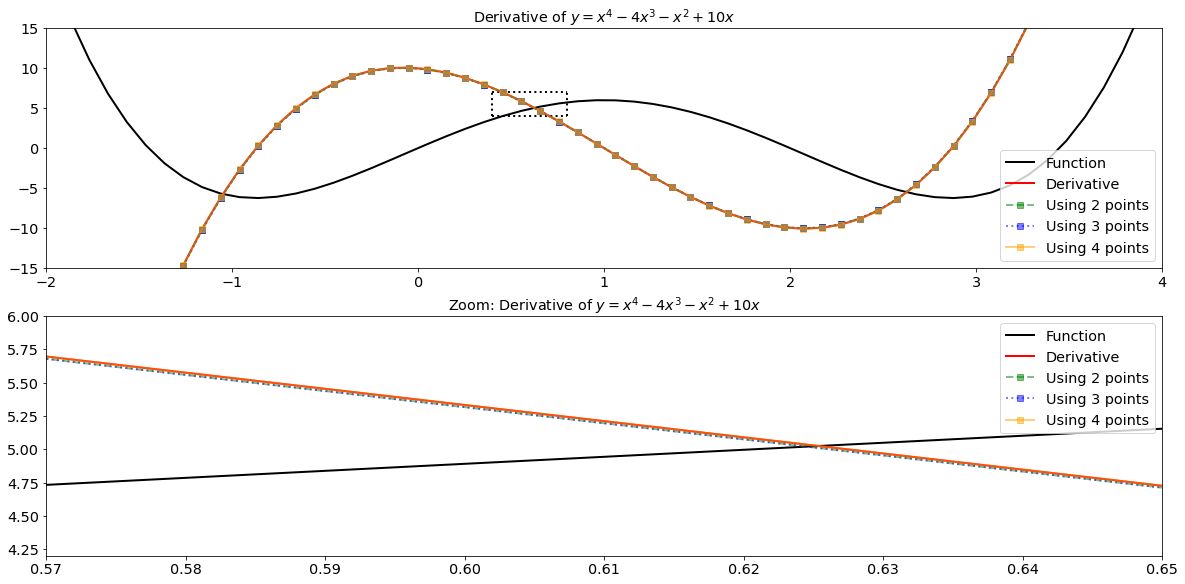

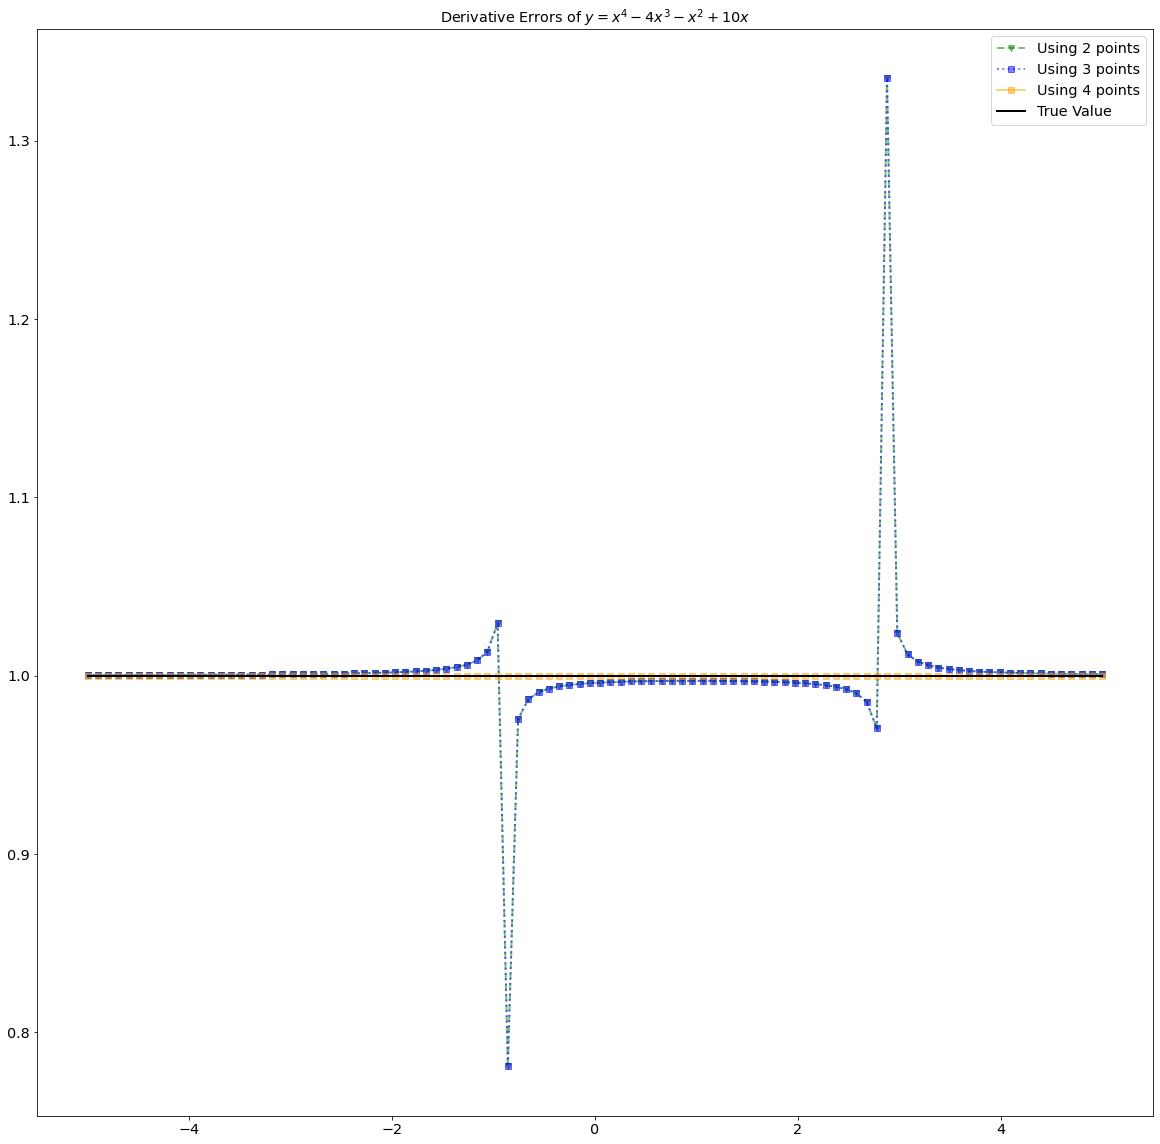

In [110]:
x1=np.linspace(-5,5,100)
f1=lambda x: x**4-4*x**3-x**2+10*x
real_dydx = lambda x1: 4*x1**3-12*x1**2-2*x1+10

# derivative_0(f1,x1)
dydxP2 = my_derivative(f1,x1,p = 2)
dydxP3 = my_derivative(f1,x1,p = 3)
dydxP4 = my_derivative(f1,x1,p = 4)


plt.figure(figsize=(20,15))
plt.subplot(311)
plt.plot(x1,f1(x1), c='k', label="Function")
plt.plot(x1,real_dydx(x1), c='r', label="Derivative")
plt.plot(x1,dydxP2, c='g',alpha=0.5, marker='s', linestyle = '--', label='Using 2 points')
plt.plot(x1,dydxP3, c='b', alpha=0.5,marker='s', linestyle = ':', label='Using 3 points')
plt.plot(x1,dydxP4, c='orange',alpha=0.5, marker='s', linestyle = '-', label='Using 4 points')
plt.title('Derivative of $y = x^4-4x^3-x^2+10x$')
plt.legend(loc='best')
plt.hlines(4,0.4,0.8,linestyles=':',color='k')
plt.hlines(7,0.4,0.8,linestyles=':',color='k')
plt.vlines(0.4,4,7,linestyles=':',color='k')
plt.vlines(0.8,4,7,linestyles=':',color='k')
plt.ylim(-15,15)
plt.xlim(-2,4)

plt.subplot(312)
plt.plot(x1,f1(x1), c='k', label="Function")
plt.plot(x1,real_dydx(x1), c='r', label="Derivative")
plt.plot(x1,dydxP2, c='g', alpha=0.5,marker='s', linestyle = '--', label='Using 2 points')
plt.plot(x1,dydxP3, c='b', alpha=0.5,marker='s', linestyle = ':', label='Using 3 points')
plt.plot(x1,dydxP4, c='orange', alpha=0.5,marker='s', linestyle = '-', label='Using 4 points')
plt.title('Zoom: Derivative of $y = x^4-4x^3-x^2+10x$')
plt.legend(loc='best')
plt.ylim(4.2,6)
plt.xlim(0.57,0.65)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(111)
plt.plot(x1,dydxP2 / real_dydx(x1), c='g',alpha=0.5, marker='v', linestyle = '--', label='Using 2 points')
plt.plot(x1,dydxP3 / real_dydx(x1), c='b',alpha=0.5, marker='s', linestyle = ':', label='Using 3 points')
plt.plot(x1,dydxP4 / real_dydx(x1), c='orange',alpha=0.5, marker='s', linestyle = '-', label='Using 4 points')
plt.plot(x1,real_dydx(x1)/ real_dydx(x1), c='k', label='True Value')
plt.title('Derivative Errors of $y = x^4-4x^3-x^2+10x$')
plt.legend(loc='best')
# plt.ylim(0.3,1.7)
# plt.xlim(-2,4)
plt.show()







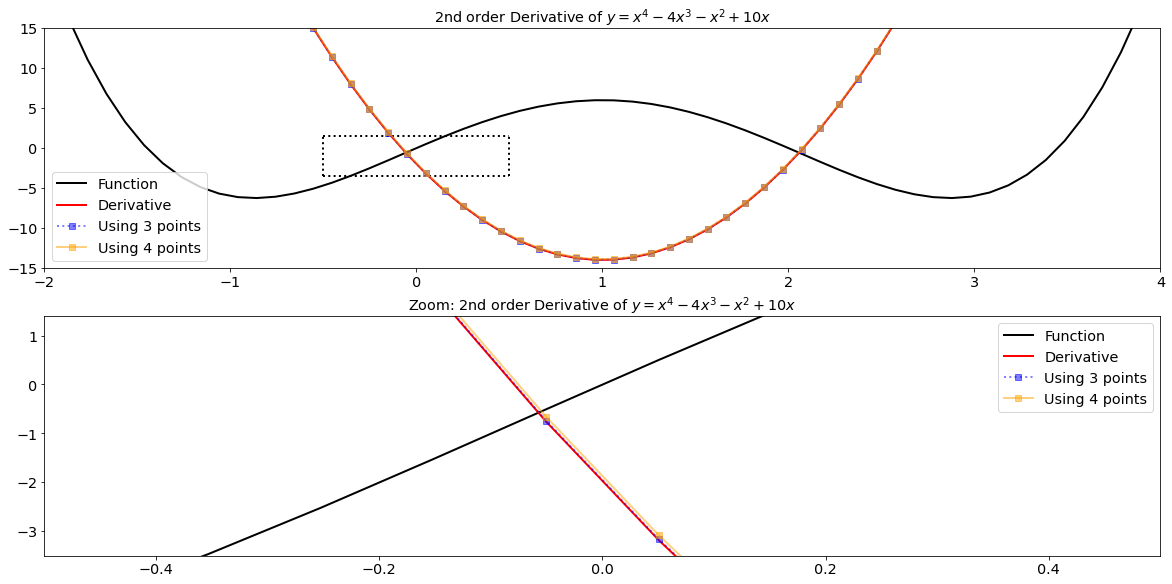

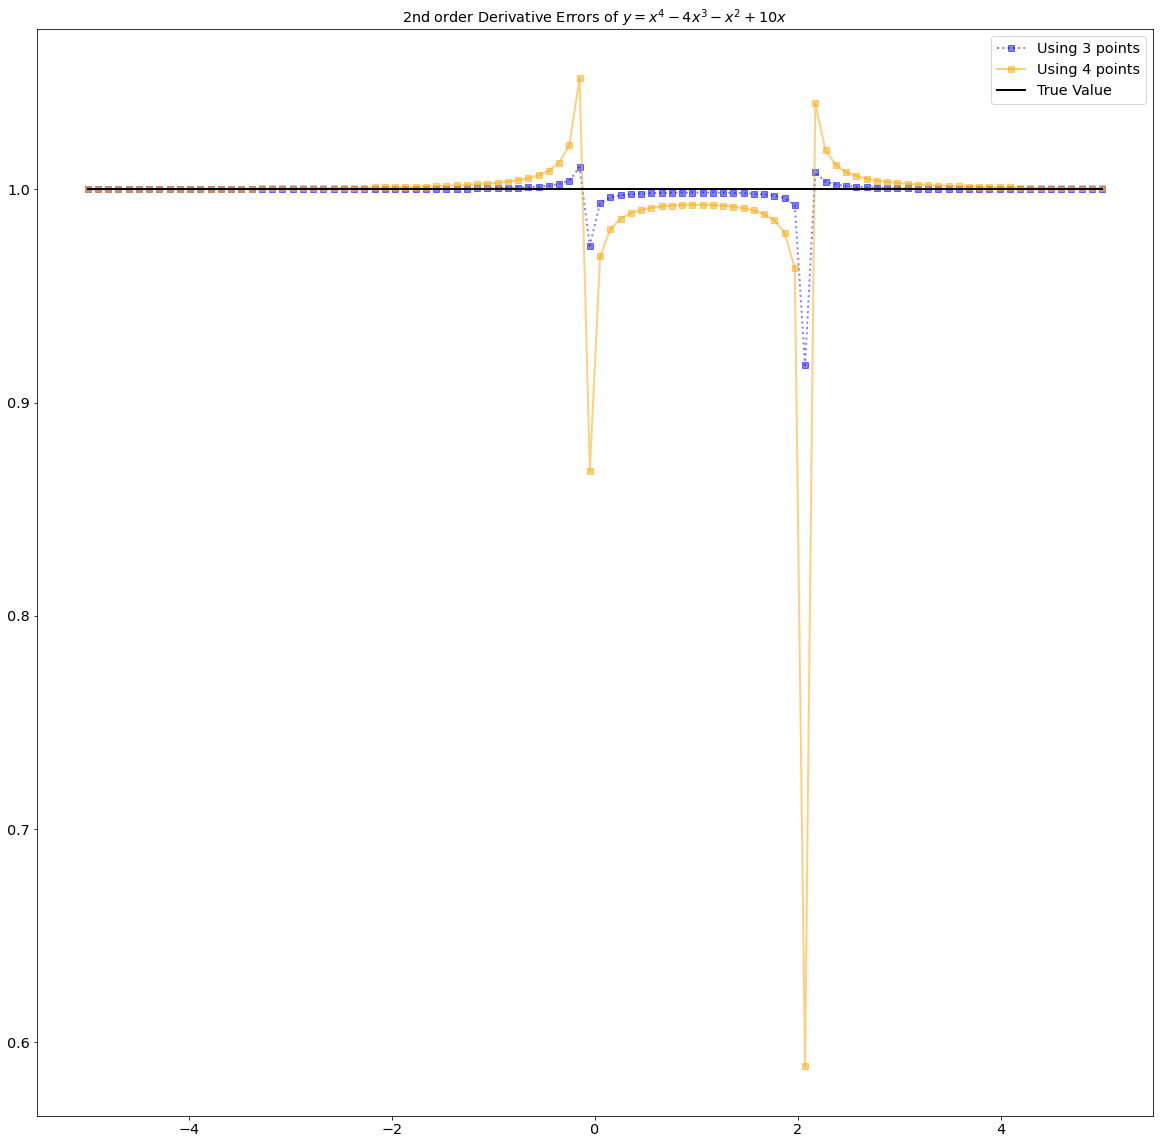

In [108]:
x1=np.linspace(-5,5,100)
f1=lambda x: x**4-4*x**3-x**2+10*x
real_dydx = lambda x1: 12*x1**2-24*x1-2

# derivative_0(f1,x1)
dydxP3 = my_derivative(f1,x1,p = 3, N=2)
dydxP4 = my_derivative(f1,x1,p = 4, N=2)


plt.figure(figsize=(20,15))
plt.subplot(311)
plt.plot(x1,f1(x1), c='k', label="Function")
plt.plot(x1,real_dydx(x1), c='r', label="Derivative")
plt.plot(x1,dydxP3, c='b', alpha=0.5,marker='s', linestyle = ':', label='Using 3 points')
plt.plot(x1,dydxP4, c='orange',alpha=0.5, marker='s', linestyle = '-', label='Using 4 points')
plt.title('2nd order Derivative of $y = x^4-4x^3-x^2+10x$')
plt.legend(loc='best')
plt.hlines(-3.5,-0.5,0.5,linestyles=':',color='k')
plt.hlines(1.5,-0.5,0.5,linestyles=':',color='k')
plt.vlines(-0.5,-3.5,1.5,linestyles=':',color='k')
plt.vlines(0.5,-3.5,1.5,linestyles=':',color='k')
plt.ylim(-15,15)
plt.xlim(-2,4)

plt.subplot(312)
plt.plot(x1,f1(x1), c='k', label="Function")
plt.plot(x1,real_dydx(x1), c='r', label="Derivative")
plt.plot(x1,dydxP3, c='b',alpha=0.5, marker='s', linestyle = ':', label='Using 3 points')
plt.plot(x1,dydxP4, c='orange',alpha=0.5, marker='s', linestyle = '-', label='Using 4 points')
plt.title('Zoom: 2nd order Derivative of $y = x^4-4x^3-x^2+10x$')
plt.legend(loc='best')
plt.ylim(-3.5,1.4)
plt.xlim(-0.5,0.5)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(111)
plt.plot(x1,dydxP3 / real_dydx(x1), c='b', alpha=0.5,marker='s', linestyle = ':', label='Using 3 points')
plt.plot(x1,dydxP4 / real_dydx(x1), c='orange', alpha=0.5,marker='s', linestyle = '-', label='Using 4 points')
plt.plot(x1,real_dydx(x1)/ real_dydx(x1), c='k', label='True Value')
plt.title('2nd order Derivative Errors of $y = x^4-4x^3-x^2+10x$')
plt.legend(loc='best')
# plt.ylim(0.3,1.7)
# plt.xlim(-2,4)
plt.show()







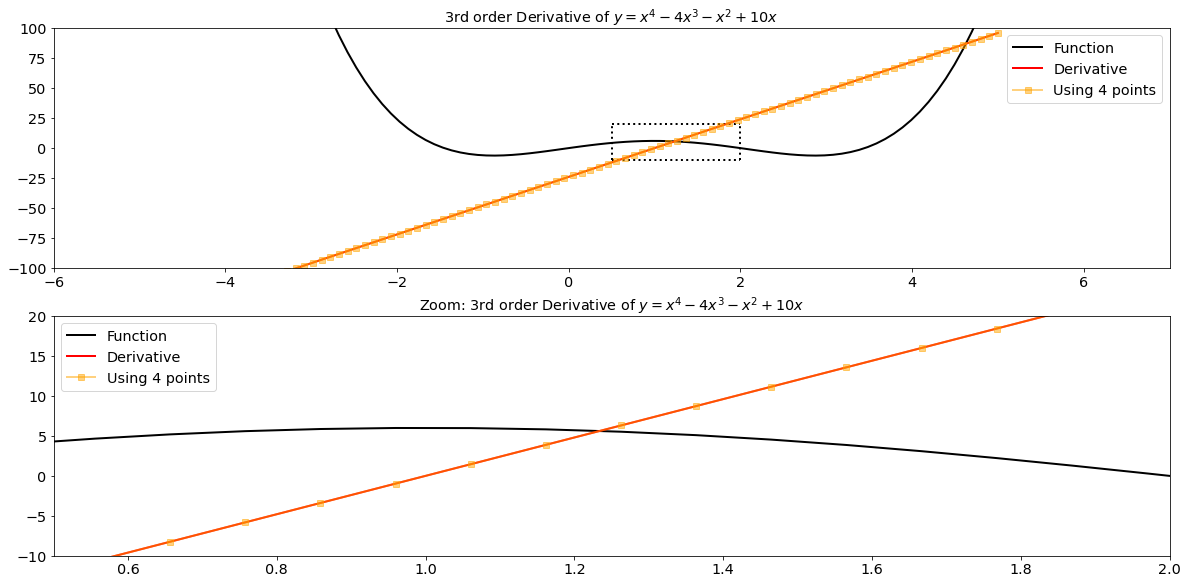

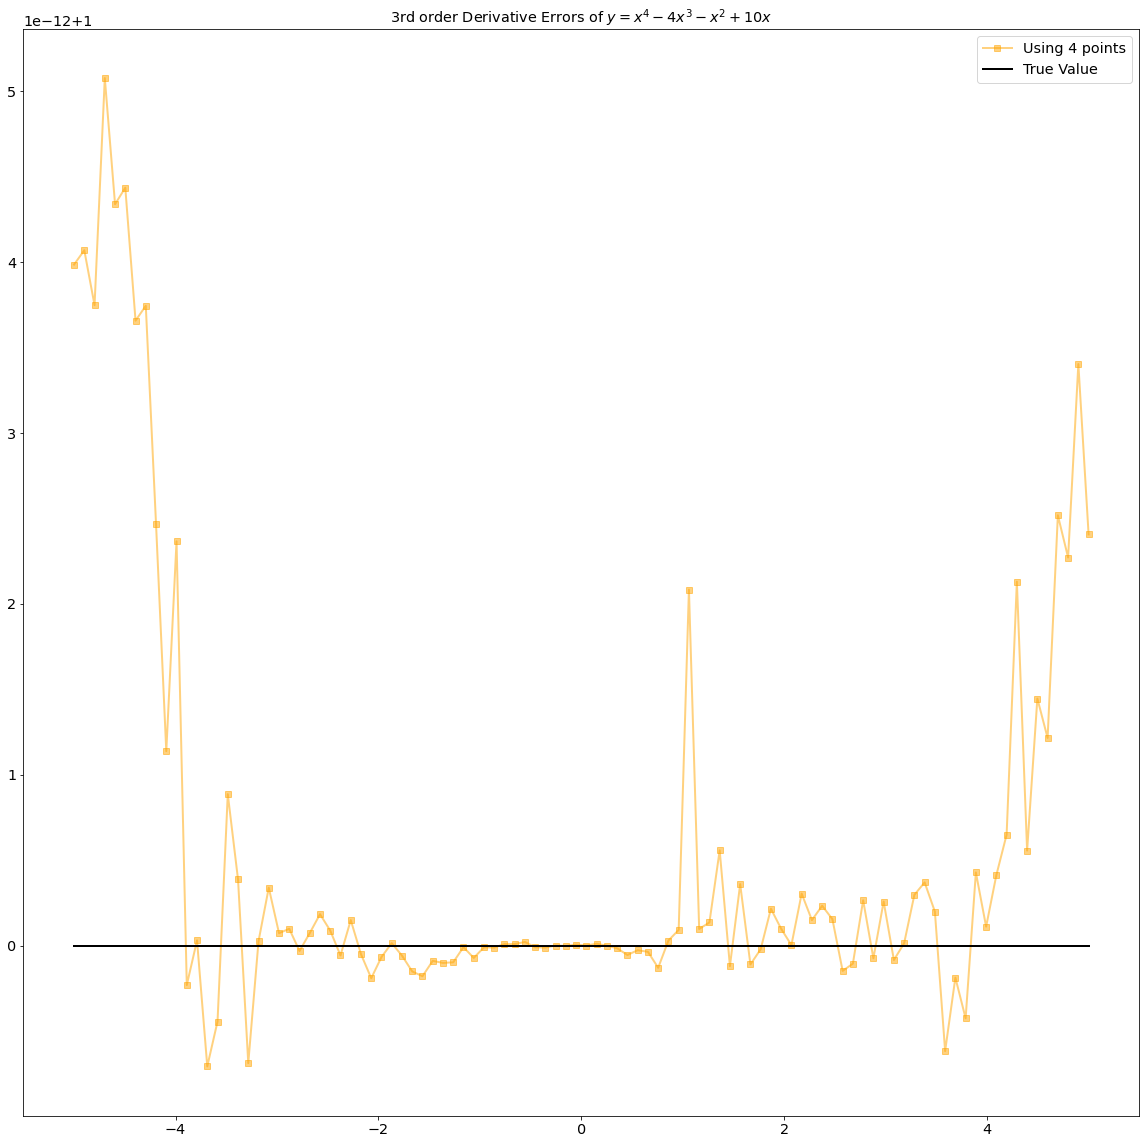

In [109]:
x1=np.linspace(-5,5,100)
f1=lambda x: x**4-4*x**3-x**2+10*x
real_dydx = lambda x1: 24*x1-24

dydxP4 = my_derivative(f1,x1,p = 4, N=3)


plt.figure(figsize=(20,15))
plt.subplot(311)
plt.plot(x1,f1(x1), c='k', label="Function")
plt.plot(x1,real_dydx(x1), c='r', label="Derivative")
plt.plot(x1,dydxP4, c='orange',alpha=0.5, marker='s', linestyle = '-', label='Using 4 points')
plt.title('3rd order Derivative of $y = x^4-4x^3-x^2+10x$')
plt.legend(loc='best')
plt.hlines(-10,0.5,2,linestyles=':',color='k')
plt.hlines(20,0.5,2,linestyles=':',color='k')
plt.vlines(0.5,-10,20,linestyles=':',color='k')
plt.vlines(2,-10,20,linestyles=':',color='k')
plt.ylim(-100,100)
plt.xlim(-6,7)

plt.subplot(312)
plt.plot(x1,f1(x1), c='k', label="Function")
plt.plot(x1,real_dydx(x1), c='r', label="Derivative")
plt.plot(x1,dydxP4, c='orange', alpha=0.5,marker='s', linestyle = '-', label='Using 4 points')
plt.title('Zoom: 3rd order Derivative of $y = x^4-4x^3-x^2+10x$')
plt.legend(loc='best')
plt.ylim(-10,20)
plt.xlim(0.5,2)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(111)
plt.plot(x1,dydxP4 / real_dydx(x1), c='orange',alpha=0.5, marker='s', linestyle = '-', label='Using 4 points')
plt.plot(x1,real_dydx(x1)/ real_dydx(x1), c='k', label='True Value')
plt.title('3rd order Derivative Errors of $y = x^4-4x^3-x^2+10x$')
plt.legend(loc='best')
# plt.ylim(0.3,1.7)
# plt.xlim(-2,4)
plt.show()

